1) For the first task assume the external load torque is zero.
a. Plot the angular velocity (𝜃̇)with respect to time.
b. Plot the SOC of the battery with respect to time.

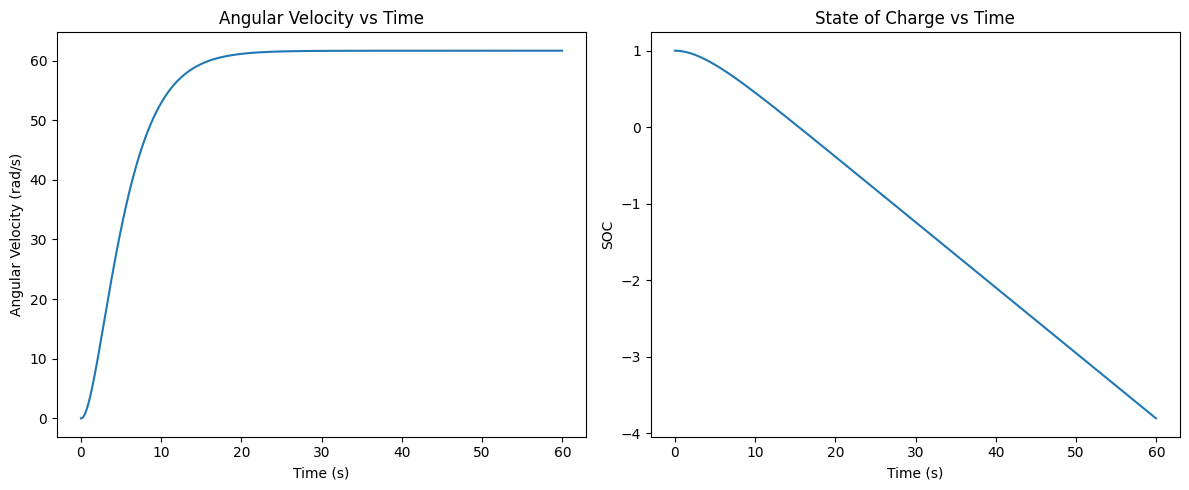

NameError: name 'external_torque' is not defined

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
J = 0.1
b = 0.05
Ke = 0.01
Kt = 0.01
Rm = 0.01
Lm = 0.05

Voc = 3.7
R0 = 0.005
R1 = 0.005
C1 = 100
Cn = 1

# Simulation settings
T = 60  # total time in seconds
dt = 0.05  # time step in seconds
N = int(T / dt)  # number of time steps

# Initialize variables
theta_dot = np.zeros(N)
theta = np.zeros(N)
i = np.zeros(N)
e = np.zeros(N)
T_motor = np.zeros(N)
Vt = np.zeros(N)
SOC = np.ones(N)
Vt[0] = Voc

# Simulation loop
for k in range(1, N):
    # Motor model
    T_motor[k] = Kt * i[k-1]
    e[k] = Ke * theta_dot[k-1]
    i[k] = (Voc - Rm * i[k-1] - e[k]) / Lm * dt + i[k-1]
    theta_dot[k] = (T_motor[k] - b * theta_dot[k-1]) / J * dt + theta_dot[k-1]
    theta[k] = theta_dot[k] * dt + theta[k-1]

    # Battery model
    Vt[k] = Voc - i[k-1] * (R0 + R1 / (1 + dt / (R1 * C1)))
    SOC[k] = SOC[k-1] - (i[k-1] * dt) / (Cn * 3600)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(N) * dt, theta_dot)
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Angular Velocity vs Time')

plt.subplot(1, 2, 2)
plt.plot(np.arange(N) * dt, SOC)
plt.xlabel('Time (s)')
plt.ylabel('SOC')
plt.title('State of Charge vs Time')

plt.tight_layout()
plt.show()




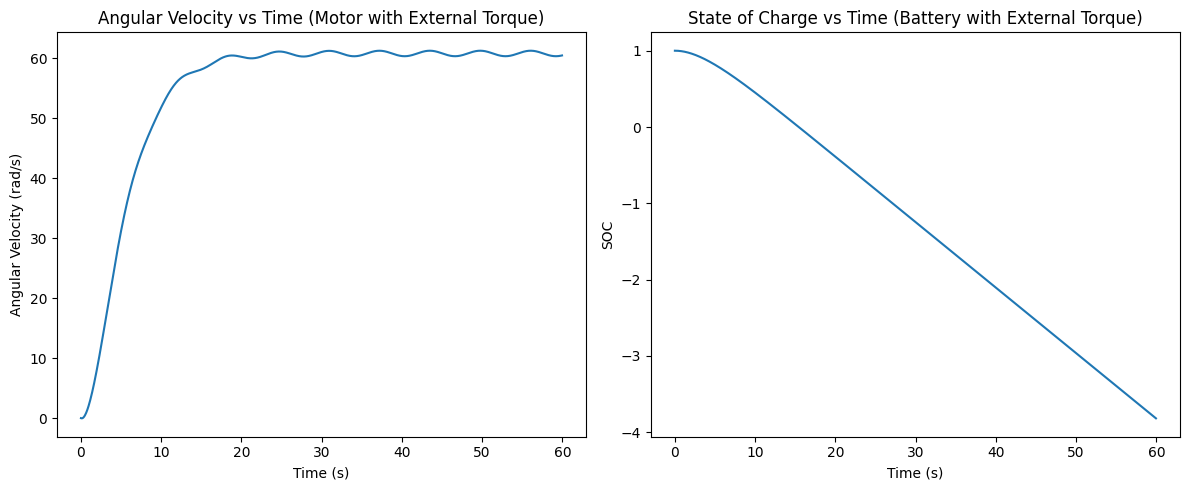

In [6]:
# Parameters
J = 0.1
b = 0.05
Ke = 0.01
Kt = 0.01
Rm = 0.01
Lm = 0.05

Voc = 3.7
R0 = 0.005
R1 = 0.005
C1 = 100
Cn = 1

# Simulation settings
T = 60  # total time in seconds
dt = 0.05  # time step in seconds
N = int(T / dt)  # number of time steps

# Initialize variables for motor
theta_dot = np.zeros(N)
theta = np.zeros(N)
i = np.zeros(N)
e = np.zeros(N)
T_motor = np.zeros(N)
external_torque = np.zeros(N)

# Initialize variables for battery
Vt = np.zeros(N)
SOC = np.ones(N)
Vt[0] = Voc

# External torque function
time = np.arange(N) * dt
external_torque = 0.05 * (1 + np.sin(time))

# Simulation loop for motor and battery
for k in range(1, N):
    # Motor model with external torque
    T_motor[k] = Kt * i[k-1]
    e[k] = Ke * theta_dot[k-1]
    i[k] = (Voc - Rm * i[k-1] - e[k]) / Lm * dt + i[k-1]
    theta_dot[k] = (T_motor[k] - b * theta_dot[k-1] - external_torque[k]) / J * dt + theta_dot[k-1]
    theta[k] = theta_dot[k] * dt + theta[k-1]

    # Battery model
    Vt[k] = Voc - i[k-1] * (R0 + R1 / (1 + dt / (R1 * C1)))
    SOC[k] = SOC[k-1] - (i[k-1] * dt) / (Cn * 3600)

# Plot results for motor
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(N) * dt, theta_dot)
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Angular Velocity vs Time (Motor with External Torque)')

# Plot results for battery
plt.subplot(1, 2, 2)
plt.plot(np.arange(N) * dt, SOC)
plt.xlabel('Time (s)')
plt.ylabel('SOC')
plt.title('State of Charge vs Time (Battery with External Torque)')

plt.tight_layout()
plt.show()


2) Now consider the external toque (in Nm) (opposite to the direction of the rotating
armature) applied follows the function, 0.05*(1+sin(time)), where time continuously
changes from 0 to 1 minute as your simulation progresses.
a. Plot the angular velocity (𝜃̇)with respect to time.
b. Plot the SOC of the battery with respect to time.

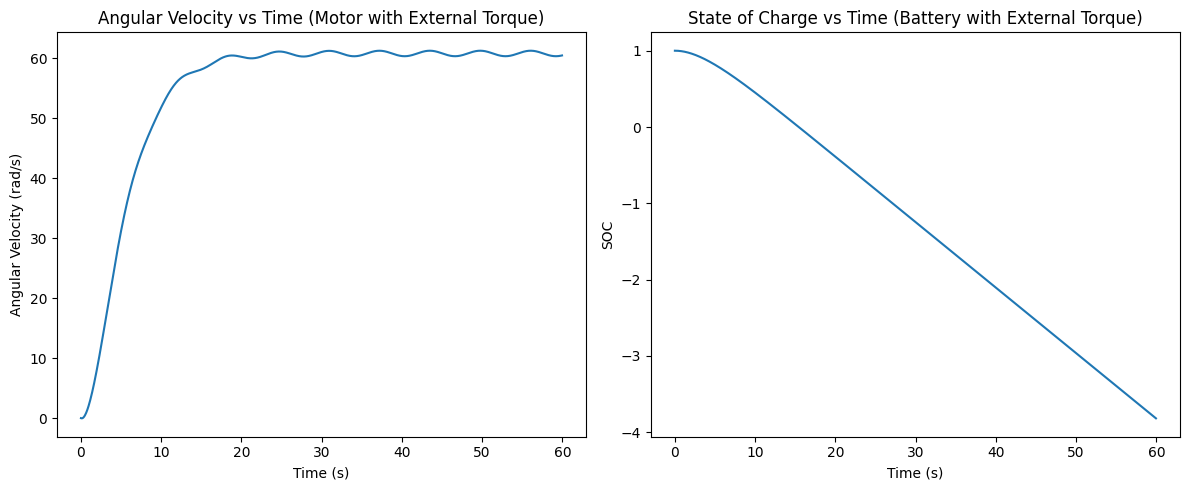

In [7]:
# Parameters
J = 0.1
b = 0.05
Ke = 0.01
Kt = 0.01
Rm = 0.01
Lm = 0.05

Voc = 3.7
R0 = 0.005
R1 = 0.005
C1 = 100
Cn = 1

# Simulation settings
T = 60  # total time in seconds
dt = 0.05  # time step in seconds
N = int(T / dt)  # number of time steps

# Initialize variables for motor
theta_dot = np.zeros(N)
theta = np.zeros(N)
i = np.zeros(N)
e = np.zeros(N)
T_motor = np.zeros(N)
external_torque = np.zeros(N)

# Initialize variables for battery
Vt = np.zeros(N)
SOC = np.ones(N)
Vt[0] = Voc

# External torque function
time = np.arange(N) * dt
external_torque = 0.05 * (1 + np.sin(time))

# Simulation loop for motor and battery
for k in range(1, N):
    # Motor model with external torque
    T_motor[k] = Kt * i[k-1]
    e[k] = Ke * theta_dot[k-1]
    i[k] = (Voc - Rm * i[k-1] - e[k]) / Lm * dt + i[k-1]
    theta_dot[k] = (T_motor[k] - b * theta_dot[k-1] - external_torque[k]) / J * dt + theta_dot[k-1]
    theta[k] = theta_dot[k] * dt + theta[k-1]

    # Battery model
    Vt[k] = Voc - i[k-1] * (R0 + R1 / (1 + dt / (R1 * C1)))
    SOC[k] = SOC[k-1] - (i[k-1] * dt) / (Cn * 3600)

# Plot results for motor
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(N) * dt, theta_dot)
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Angular Velocity vs Time (Motor with External Torque)')

# Plot results for battery
plt.subplot(1, 2, 2)
plt.plot(np.arange(N) * dt, SOC)
plt.xlabel('Time (s)')
plt.ylabel('SOC')
plt.title('State of Charge vs Time (Battery with External Torque)')

plt.tight_layout()
plt.show()
